### Geo-Location spatial analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from pathlib import Path
p = Path('data')

In [2]:
#import datasets
customer_df = pd.read_csv(p/'olist_customers_dataset.csv', low_memory=False)
geo_df = pd.read_csv(p/'olist_geolocation_dataset.csv', low_memory=False, dtype={'geolocation_zip_code_prefix': str})
items_df = pd.read_csv(p/'olist_order_items_dataset.csv', low_memory=False)
pay_df = pd.read_csv(p/'olist_order_payments_dataset.csv', low_memory=False)
review_df = pd.read_csv(p/'olist_order_reviews_dataset.csv', low_memory=False)
order_df = pd.read_csv(p/'olist_orders_dataset.csv', low_memory=False)
product_df = pd.read_csv(p/'olist_products_dataset.csv', low_memory=False)
translation_df = pd.read_csv(p/'product_category_name_translation.csv', low_memory=False)
sellers_df = pd.read_csv(p/'olist_sellers_dataset.csv', low_memory=False)

In [3]:
#list of all dataframes
files = [customer_df, geo_df, items_df, pay_df, review_df, order_df, product_df, translation_df, sellers_df]
files_name = ['customer_df', 'geo_df', 'items_df', 'pay_df', 'review_df', 'order_df', 'product_df', 'translation_df', 'sellers_df']

In [4]:
#summarise and explore the null values in each dataset
for id, item in enumerate (files):
    print ('Dataframe name: ' + str (files_name[id]) + ' with number of rows: ' + str (item.shape[0]) + ' and columns: ' + str (item.shape[1]))
    display (item.describe())
    print (round(item.isnull().sum()/item.shape[0]*100, 2))
    print ('--------------------')
    print(item.info())
    print ('\n')

Dataframe name: customer_df with number of rows: 99441 and columns: 5


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Dataframe name: geo_df with number of rows: 1000163 and columns: 5


,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06
mean,-2.117615e+01,-4.639054e+01
std,5.715866e+00,4.269748e+00
min,-3.660537e+01,-1.014668e+02
25%,-2.360355e+01,-4.857317e+01
50%,-2.291938e+01,-4.663788e+01
75%,-1.997962e+01,-4.376771e+01
max,4.506593e+01,1.211054e+02


geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB
None


Dataframe name: items_df with number of rows: 112650 and columns: 7


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


Dataframe name: pay_df with number of rows: 103886 and columns: 5


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


Dataframe name: review_df with number of rows: 100000 and columns: 7


,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


review_id                   0.00
order_id                    0.00
review_score                0.00
review_comment_title       88.28
review_comment_message     58.25
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


Dataframe name: order_df with number of rows: 99441 and columns: 8


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,9ae2615288bae316687074b5dfadaf46,653d1bb20bc75577254028ece6cdf1ef,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.16
order_delivered_carrier_date     1.79
order_delivered_customer_date    2.98
order_estimated_delivery_date    0.00
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


product_id                    0.00
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm      

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,climatizacao,auto
freq,1,1


product_category_name            0.0
product_category_name_english    0.0
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


Dataframe name: sellers_df with number of rows: 3095 and columns: 4


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None




#### Explore geo-location data

In [5]:
geo_df['geolocation_zip_code_prefix'].value_counts().to_frame().describe()

,geolocation_zip_code_prefix
count,19015.000000
mean,52.598633
std,72.057907
min,1.000000
25%,10.000000
50%,29.000000
75%,66.500000
max,1146.000000


In [6]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [7]:
geo_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.545621,-46.639292,sao paulo,SP
1,01046,-23.546081,-46.644820,sao paulo,SP
2,01046,-23.546129,-46.642951,sao paulo,SP
3,01041,-23.544392,-46.639499,sao paulo,SP
4,01035,-23.541578,-46.641607,sao paulo,SP


In [8]:
# Removing some outliers (out of Brazil territory)
# credit >> https://www.kaggle.com/andresionek/geospatial-analysis-of-brazilian-e-commerce

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_df = geo_df[geo_df.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_df = geo_df[geo_df.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_df = geo_df[geo_df.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_df = geo_df[geo_df.geolocation_lng <=  -34.79314722]

In [9]:
# Zipcode pattern of Brazil
geo_df['geolocation_zip_code_prefix_3_digits'] = geo_df['geolocation_zip_code_prefix'].str[0:3]
geo_df['geolocation_zip_code_prefix_4_digits'] = geo_df['geolocation_zip_code_prefix'].str[0:4]

In [10]:
# Transform the coordinates into Mercator coordinates (standardisation)
from datashader.utils import lnglat_to_meters as webm

x_coords, y_coords = webm(geo_df['geolocation_lng'], geo_df['geolocation_lat'])
geo_df['x'] = pd.Series(x_coords)
geo_df['y'] = pd.Series(y_coords)

In [11]:
geo_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits,x,y
0,01037,-23.545621,-46.639292,sao paulo,SP,010,0103,-5.191862e+06,-2.698137e+06
1,01046,-23.546081,-46.644820,sao paulo,SP,010,0104,-5.192478e+06,-2.698193e+06
2,01046,-23.546129,-46.642951,sao paulo,SP,010,0104,-5.192270e+06,-2.698199e+06
3,01041,-23.544392,-46.639499,sao paulo,SP,010,0104,-5.191885e+06,-2.697988e+06
4,01035,-23.541578,-46.641607,sao paulo,SP,010,0103,-5.192120e+06,-2.697646e+06


In [12]:
# Plot zipcode of the data
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, bgy, bjy, bkr, kb, kr, cwr, gwv

export = partial(export_image, background = 'white', export_path= 'geo_analytics/image')

def create_map(data, cmap, data_agg, export_name):
    #focus the country's grid
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    width  = int(500)
    height = int(width * ratio)
    if ratio > 1.5:
        height = 550
        width = int(height / ratio)
        
    cvs = ds.Canvas(plot_width=width, plot_height=height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

In [13]:
# Transforming the prefixes to int for plotting purposes
geo_df['geolocation_zip_code_prefix'] = geo_df['geolocation_zip_code_prefix'].astype(int)

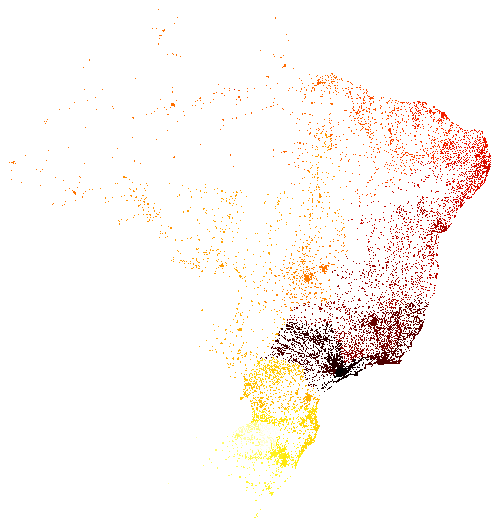

In [14]:
create_map(geo_df, fire, ds.mean('geolocation_zip_code_prefix'),'Brazil zip code')

### Earnings from each zip code (3-digits)

In [15]:
geo_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits,x,y
0,1037,-23.545621,-46.639292,sao paulo,SP,010,0103,-5.191862e+06,-2.698137e+06
1,1046,-23.546081,-46.644820,sao paulo,SP,010,0104,-5.192478e+06,-2.698193e+06
2,1046,-23.546129,-46.642951,sao paulo,SP,010,0104,-5.192270e+06,-2.698199e+06
3,1041,-23.544392,-46.639499,sao paulo,SP,010,0104,-5.191885e+06,-2.697988e+06
4,1035,-23.541578,-46.641607,sao paulo,SP,010,0103,-5.192120e+06,-2.697646e+06


In [16]:
order_merged = order_df.merge(items_df, on='order_id')
order_merged = order_merged.merge(customer_df, on='customer_id')

In [17]:
# Zip code pattern of Brazil
order_merged['customer_zip_code_prefix'] = order_merged['customer_zip_code_prefix'].astype(str)
order_merged['customer_zip_code_prefix_3_digits'] = order_merged['customer_zip_code_prefix'].str[0:3]
order_merged['customer_zip_code_prefix_4_digits'] = order_merged['customer_zip_code_prefix'].str[0:4]

In [18]:
order_merged.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_zip_code_prefix_3_digits,customer_zip_code_prefix_4_digits
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,314,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,478,4781
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,752,7526
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,592,5929
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,919,9195


In [19]:
_ = order_merged.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
temp_3digit = geo_df.set_index('geolocation_zip_code_prefix_3_digits')
order_rev = temp_3digit.join(_)

In [20]:
order_rev.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geolocation_zip_code_prefix_4_digits,x,y,price
010,1037,-23.545621,-46.639292,sao paulo,SP,0103,-5.191862e+06,-2.698137e+06,NaN
010,1046,-23.546081,-46.644820,sao paulo,SP,0104,-5.192478e+06,-2.698193e+06,NaN
010,1046,-23.546129,-46.642951,sao paulo,SP,0104,-5.192270e+06,-2.698199e+06,NaN
010,1041,-23.544392,-46.639499,sao paulo,SP,0104,-5.191885e+06,-2.697988e+06,NaN
010,1035,-23.541578,-46.641607,sao paulo,SP,0103,-5.192120e+06,-2.697646e+06,NaN


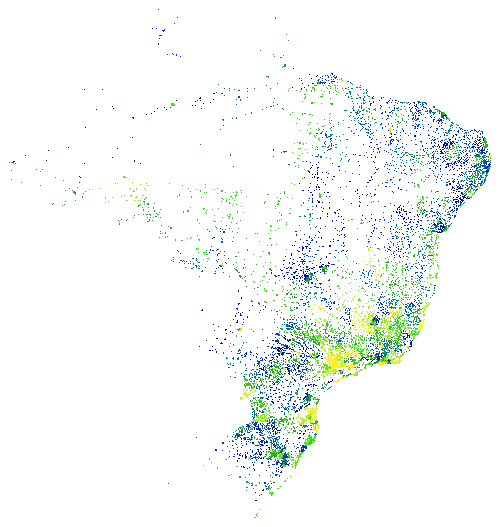

In [21]:
create_map(order_rev, bgy, ds.mean('price'),'Revenue by zip code')

### Transportation cost

In [22]:
_ = order_merged.groupby('customer_zip_code_prefix_3_digits')['freight_value'].sum().to_frame()
temp_3digit = geo_df.set_index('geolocation_zip_code_prefix_3_digits')
transport_cost = temp_3digit.join(_)

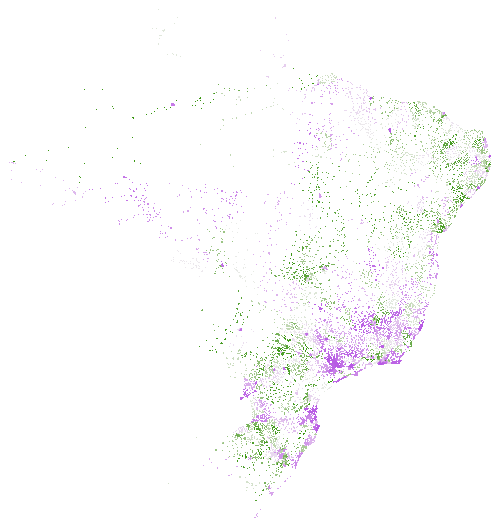

In [23]:
create_map(transport_cost, gwv, ds.mean('freight_value'),'Transport cost by zip code')